# Index
> 1. Import Libraries
> 2. Preprocessing
> 3. Remove duplicates
> 4. Handle Missing Value
> 5. Data Transformation
> 6. Feature scaling
> 7. Exploratory Data Analysis (EDA)
> 8. Feature Selection (Didn't use)
> 9. Check imbalance data
> 10. SMOTE-ENN
> 11. Fix Imbalanced data
> 12. Split the data into training and testing sets
> 13. K-NN
> 14. Random Forest Classification
> 15. XGBoost Classification
> 16. Best models
> 17. Model Evaluation
> 18. Plot best models vs accuracy

# 1. Import Libraries

In [77]:
#from google.colab import drive
#drive.mount('/content/drive')

import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from collections import Counter

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score, confusion_matrix, classification_report

from sklearn.base import clone
from imblearn.pipeline import Pipeline

from sklearn.feature_selection import RFE

import seaborn as sns
import matplotlib.pyplot as plt

# 2. Preprocessing

In [2]:
# menambahkan nama kolom
features = ["Age", "Gender", "Total Bilirubin", "Direct Bilirubin", "Alkphos Alkaline Phosphotase", "Sgpt Alamine Aminotransferase", "Sgot Aspartate Aminotransferase", "Total Protiens", "Albumin", "Albumin-Globulin Ratio", "Selector"]
#df = pd.read_csv('/content/drive/MyDrive/Skripsi/Data/Indian Liver Patient Dataset (ILPD).csv', names = features)
df = pd.read_csv('Indian Liver Patient Dataset (ILPD).csv', names = features)
df.head()

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,Albumin,Albumin-Globulin Ratio,Selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
df.describe()

,Age,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,Albumin,Albumin-Globulin Ratio,Selector
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [4]:
# melihat informasi tentang data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              583 non-null    int64  
 1   Gender                           583 non-null    object 
 2   Total Bilirubin                  583 non-null    float64
 3   Direct Bilirubin                 583 non-null    float64
 4   Alkphos Alkaline Phosphotase     583 non-null    int64  
 5   Sgpt Alamine Aminotransferase    583 non-null    int64  
 6   Sgot Aspartate Aminotransferase  583 non-null    int64  
 7   Total Protiens                   583 non-null    float64
 8   Albumin                          583 non-null    float64
 9   Albumin-Globulin Ratio           579 non-null    float64
 10  Selector                         583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [5]:
# jumlah baris dan kolom data
df.shape

(583, 11)

## 3. Data Duplikat

In [6]:
# cek data duplikat
print("Jumlah data duplikat:", df.duplicated().sum())
df[df.duplicated(keep=False)]

Jumlah data duplikat: 13


,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,Albumin,Albumin-Globulin Ratio,Selector
18,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
19,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
25,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
26,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
33,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
34,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
54,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
55,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
61,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1
62,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1


In [7]:
# menghapus data duplikat
# Secara default, fungsi ini akan mempertahankan baris pertama yang ditemukan
# dan menghapus baris duplikat yang berikutnya.
df=df.drop_duplicates()
print(df.shape)

(570, 11)


In [8]:
# cek data duplikat kembali
print("Jumlah data duplikat:", df.duplicated().sum())
df[df.duplicated(keep=False)]

Jumlah data duplikat: 0


,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,Albumin,Albumin-Globulin Ratio,Selector


## 4. Handle Missing Value

In [9]:
# cek missing value
df.isnull().sum()

Age                                0
Gender                             0
Total Bilirubin                    0
Direct Bilirubin                   0
Alkphos Alkaline Phosphotase       0
Sgpt Alamine Aminotransferase      0
Sgot Aspartate Aminotransferase    0
Total Protiens                     0
Albumin                            0
Albumin-Globulin Ratio             4
Selector                           0
dtype: int64

In [10]:
# missing value pada variabel Albumin-Globulin Ratio diisi dengan nilai median dari kadar albumin dan globulin seluruh pasien
df['Albumin-Globulin Ratio'].fillna(df['Albumin-Globulin Ratio'].median(), inplace=True)

The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Albumin-Globulin Ratio'].fillna(df['Albumin-Globulin Ratio'].median(), inplace=True)


In [11]:
# cek missing value kembali
df.isnull().sum()

Age                                0
Gender                             0
Total Bilirubin                    0
Direct Bilirubin                   0
Alkphos Alkaline Phosphotase       0
Sgpt Alamine Aminotransferase      0
Sgot Aspartate Aminotransferase    0
Total Protiens                     0
Albumin                            0
Albumin-Globulin Ratio             0
Selector                           0
dtype: int64

## 5. Transformasi Data

In [12]:
# mengubah value 1 dan 2 pada atribut Selector menjadi 0 dan 1
df['Selector'] = df['Selector'].replace({1: 1, 2: 0})
pd.unique(df["Selector"])

array([1, 0], dtype=int64)

In [13]:
# Transfrom Gender string into float values
# mengubah female dan male menjadi 0 dan 1
le = preprocessing.LabelEncoder()
le.fit(['Male','Female'])
df.loc[:,'Gender'] = le.transform(df['Gender'])
df.head()

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,Albumin,Albumin-Globulin Ratio,Selector
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


## 6. Feature scaling

## Standardization

In [14]:
# Splitting of Data into Independent and Dependent Variables
X=df.drop(['Selector'],axis=1)
Y=df['Selector']

In [15]:
X.head()

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,Albumin,Albumin-Globulin Ratio
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40


In [16]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Selector, dtype: int64

In [17]:
# Standardization menggunakan StandardScaler()
sc=StandardScaler()
X=sc.fit_transform(X)
X

array([[ 1.24174059, -1.75254916, -0.41864741, ...,  0.27928958,
         0.18973749, -0.15088921],
       [ 1.0568741 ,  0.5705974 ,  1.21011064, ...,  0.92305933,
         0.06412731, -0.65366948],
       [ 1.0568741 ,  0.5705974 ,  0.63525486, ...,  0.4632238 ,
         0.18973749, -0.18231298],
       ...,
       [ 0.4406525 ,  0.5705974 , -0.40267919, ..., -0.08857885,
         0.06412731,  0.16334846],
       [-0.85341287,  0.5705974 , -0.32283811, ...,  0.27928958,
         0.31534768,  0.16334846],
       [-0.42205774,  0.5705974 , -0.37074276, ...,  0.73912512,
         1.57144955,  1.73453679]])

In [18]:
# membuat dataFrame hasil standardisasi
X= pd.DataFrame(X)
X.columns = ["Age", "Gender", "Total Bilirubin", "Direct Bilirubin", "Alkphos Alkaline Phosphotase", "Sgpt Alamine Aminotransferase", "Sgot Aspartate Aminotransferase", "Total Protiens", "Albumin", "Albumin-Globulin Ratio"]
X

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,Albumin,Albumin-Globulin Ratio
0,1.241741,-1.752549,-0.418647,-0.493702,-0.427421,-0.351482,-0.314428,0.279290,0.189737,-0.150889
1,1.056874,0.570597,1.210111,1.413923,1.661722,-0.086746,-0.032278,0.923059,0.064127,-0.653669
2,1.056874,0.570597,0.635255,0.919354,0.808927,-0.108807,-0.142385,0.463224,0.189737,-0.182313
3,0.810385,0.570597,-0.370743,-0.387723,-0.447823,-0.362513,-0.307546,0.279290,0.315348,0.163348
4,1.673096,0.570597,0.092336,0.177500,-0.394778,-0.290813,-0.173353,0.739125,-0.940754,-1.722078
...,...,...,...,...,...,...,...,...,...,...
565,0.933630,0.570597,-0.450584,-0.493702,0.849731,-0.329421,-0.259374,-0.548414,-1.945636,-1.816349
566,-0.298813,0.570597,-0.434616,-0.493702,-0.790573,-0.246691,-0.269697,-0.456447,0.064127,0.477586
567,0.440653,0.570597,-0.402679,-0.458375,-0.190760,-0.174991,-0.207761,-0.088579,0.064127,0.163348
568,-0.853413,0.570597,-0.322838,-0.352396,-0.439662,-0.279783,-0.266256,0.279290,0.315348,0.163348


# Hyperparameter

SMOTE-ENN:
- tetangga terdekat SMOTE = 3, 5, 7
- tetangga terdekat ENN = 3, 5, 7

k-NN:
- tetangga terdekat = 1, 3, 5, …, 𝑘𝑚𝑎𝑥,
  
  dengan 𝑘𝑚𝑎𝑥 ≤ √jumlah data latih

Random Forest:
- n estimators = 1, 2, 3, ..., 200
- criterion = ‘gini’, ‘entropy’
- random state = 0

Extreme Gradient Boosting
- n estimators = 1, 2, 3, ..., 150
- subsample = 0.7, 0.8, 0.9
- depth = 3, 4, 5, …, 30, 31

## 7. Exploratory Data Analysis (EDA)

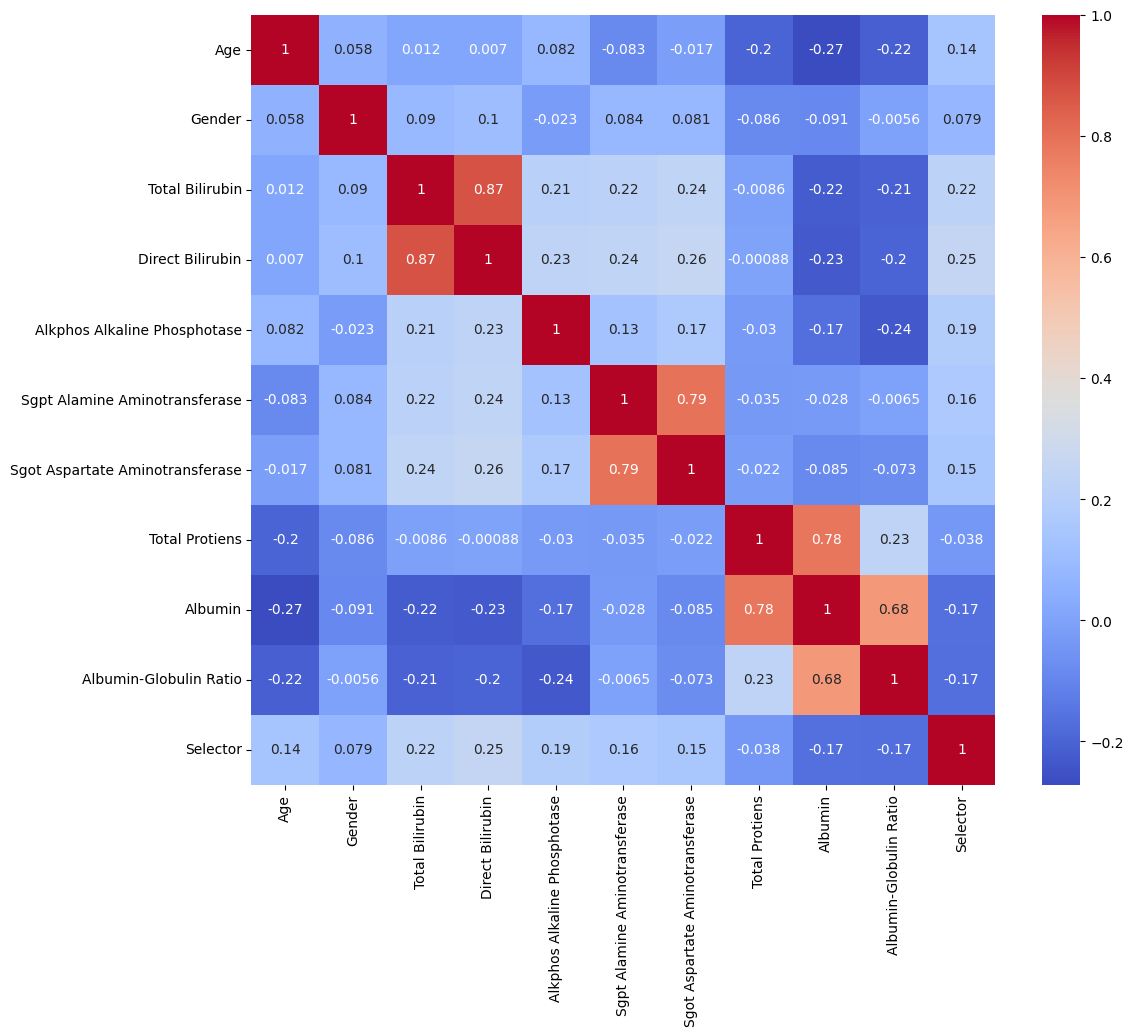

In [19]:
# Correlation Matrix
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

## 8. Feature Selection

In [20]:
# Based on Correlation Matrix
selected_features = ['Age', 'Total Bilirubin', 'Direct Bilirubin', 'Alkphos Alkaline Phosphotase', 'Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase']

In [21]:
X_selected = X.loc[:, selected_features]

In [22]:
X_selected.head()

,Age,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase
0,1.241741,-0.418647,-0.493702,-0.427421,-0.351482,-0.314428
1,1.056874,1.210111,1.413923,1.661722,-0.086746,-0.032278
2,1.056874,0.635255,0.919354,0.808927,-0.108807,-0.142385
3,0.810385,-0.370743,-0.387723,-0.447823,-0.362513,-0.307546
4,1.673096,0.092336,0.177500,-0.394778,-0.290813,-0.173353


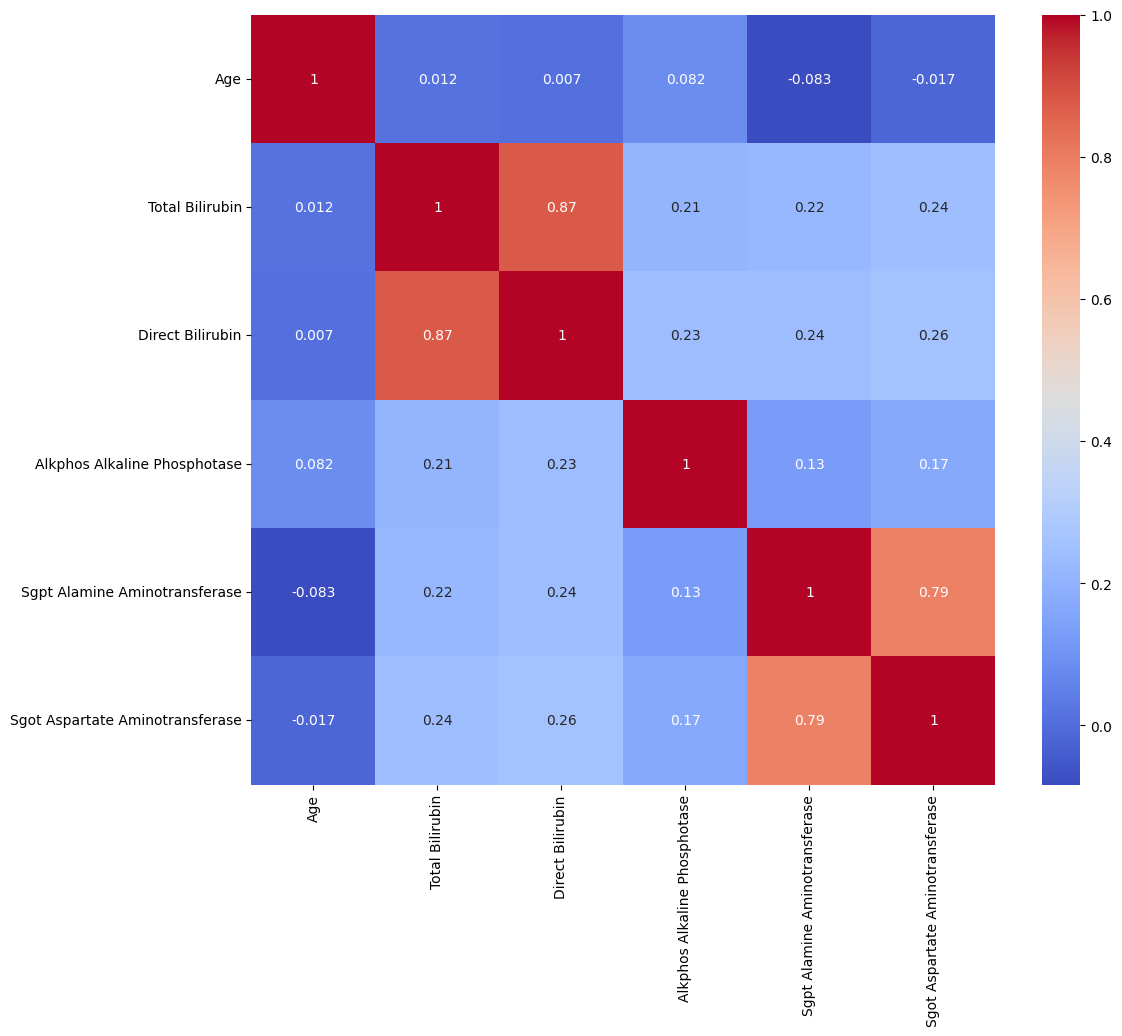

In [23]:
# Correlation Matrix on selected_features
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
sns.heatmap(X_selected.corr(), annot=True, cmap='coolwarm')
plt.show()

## 9. Check Imbalanced data

In [24]:
print(Counter(Y))
print("Label 0", Counter(Y)[0])
print("Label 1", Counter(Y)[1])

Counter({1: 406, 0: 164})
Label 0 164
Label 1 406


# 10. SMOTE-ENN

In [25]:
smote_k_neighbors = [3, 5, 7]
enn_n_neighbors = [3, 5, 7]

In [43]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [27]:
smote = SMOTE(random_state=42, sampling_strategy=0.7)
enn = EditedNearestNeighbours(sampling_strategy='auto')
smote_enn = SMOTEENN(smote=smote, enn=enn, random_state=42)

## 11. Fix Imbalanced data

In [28]:
X_resampled, Y_resampled = smote_enn.fit_resample(X, Y)

In [29]:
print(Counter(Y_resampled))
print("Label 0", Counter(Y_resampled)[0])
print("Label 1", Counter(Y_resampled)[1])

Counter({0: 284, 1: 176})
Label 0 284
Label 1 176


## 12. Split the data into training and testing sets

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X_resampled, Y_resampled,
    test_size=0.2,
    random_state=42,
)

## 13. K-NN

In [ ]:
k_max = int(np.floor(np.sqrt(X.shape[0])))
k_list = list(range(1, k_max + 1, 2))

In [46]:
pipeline_knn = Pipeline([
    ('sampling', smote_enn),
    ('classifier', KNeighborsClassifier())
])

In [47]:
param_grid_knn = {
    'sampling__smote__k_neighbors': smote_k_neighbors,
    'sampling__enn__n_neighbors': enn_n_neighbors,
    'classifier__n_neighbors': k_list
}

In [ ]:
grid_search_knn = GridSearchCV(pipeline_knn, param_grid=param_grid_knn,
                               cv=kf, scoring='f1_weighted', n_jobs=-1, verbose=1)


In [67]:
grid_search_knn.fit(X_train, Y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('sampling',
                                        SMOTEENN(enn=EditedNearestNeighbours(),
                                                 random_state=42,
                                                 smote=SMOTE(random_state=42,
                                                             sampling_strategy=0.7))),
                                       ('classifier', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15,
                                                     17, 19, 21, 23],
                         'sampling__enn__n_neighbors': [3, 5, 7],
                         'sampling__smote__k_neighbors': [3, 5, 7]},
             refit='f1_weighted',
             scoring={'balanced_accuracy': make_scorer(balanced_accuracy_score, response_method='predict'),
                      'f1_weighted': make_scorer(f1_score, response_method='predict', average=weighted)},
             verbose=4)

In [ ]:
print('Best parameters K-NN:', grid_search_knn.best_params_)

Best parameters K-NN: {'classifier__n_neighbors': 1, 'sampling__enn__n_neighbors': 3, 'sampling__smote__k_neighbors': 3}
Best accuracy K-NN: 0.9033126415846903


# 14. Random Forest Classification

In [85]:
n_estimators_rf = list(range(1, 201))
criterion_rf = ['gini', 'entropy']
random_state_rf = [0]

In [86]:
pipeline_rf = Pipeline([
    ('sampling', smote_enn),
    ('classifier', RandomForestClassifier())
])

In [87]:
param_grid_rf = {
    'sampling__smote__k_neighbors': smote_k_neighbors,
    'sampling__enn__n_neighbors': enn_n_neighbors,
    'classifier__n_estimators': n_estimators_rf,
    'classifier__criterion': criterion_rf,
    'classifier__random_state': random_state_rf
}

In [89]:
grid_search_rf = GridSearchCV(pipeline_rf, param_grid=param_grid_rf,
                              cv=kf, scoring='f1_weighted', n_jobs=-1, verbose=1)

In [90]:
grid_search_rf.fit(X_train, Y_train)

Fitting 10 folds for each of 3600 candidates, totalling 36000 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('sampling',
                                        SMOTEENN(enn=EditedNearestNeighbours(),
                                                 random_state=42,
                                                 smote=SMOTE(random_state=42,
                                                             sampling_strategy=0.7))),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                         'classifier__random_state': [0],
                         'sampling__enn__n_neighbors': [3, 5, 7],
                         'sampling__smote__k_neighbors': [3, 5, 7]},
             scoring='f1_weighted', verbose=1)

In [91]:
print('Best parameters Random Forest:', grid_search_rf.best_params_)

Best parameters Random Forest: {'classifier__criterion': 'entropy', 'classifier__n_estimators': 164, 'classifier__random_state': 0, 'sampling__enn__n_neighbors': 3, 'sampling__smote__k_neighbors': 5}


## 15. XGBoost Classification

In [92]:
n_estimators_xgb = list(range(1, 151))
subsample_xgb = [0.7, 0.8, 0.9]
max_depth_xgb = list(range(3, 31))

In [93]:
pipeline_xgb = Pipeline([
    ('sampling', smote_enn),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])


In [94]:
param_grid_xgb = {
    'sampling__smote__k_neighbors': smote_k_neighbors,
    'sampling__enn__n_neighbors': enn_n_neighbors,
    'classifier__n_estimators': n_estimators_xgb,
    'classifier__subsample': subsample_xgb,
    'classifier__max_depth': max_depth_xgb
}

In [95]:
grid_search_xgb = GridSearchCV(pipeline_xgb, param_grid=param_grid_xgb,
                               cv=kf, scoring='f1_weighted', n_jobs=-1, verbose=1)

In [96]:
grid_search_xgb.fit(X_train, Y_train)

Fitting 10 folds for each of 113400 candidates, totalling 1134000 fits


Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('sampling',
                                        SMOTEENN(enn=EditedNearestNeighbours(),
                                                 random_state=42,
                                                 smote=SMOTE(random_state=42,
                                                             sampling_strategy=0.7))),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      d...
             param_grid={'classifier__max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11,
                                                   12, 13, 14, 15, 16, 17, 18,
                                                   19, 20, 21, 22, 23, 24, 25,
                                                   26, 27, 28, 29, 30],
                         'classifier__n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                         'classifier__subsample': [0.7, 0.8, 0.9],
                         'sampling__enn__n_neighbors': [3, 5, 7],
                         'sampling__smote__k_neighbors': [3, 5, 7]},
             scoring='f1_weighted', verbose=1)

In [97]:
print('Best parameters XGBoost:', grid_search_xgb.best_params_)

Best parameters XGBoost: {'classifier__max_depth': 7, 'classifier__n_estimators': 28, 'classifier__subsample': 0.7, 'sampling__enn__n_neighbors': 3, 'sampling__smote__k_neighbors': 5}


## 16. Best models

In [117]:
best_model_knn = grid_search_knn.best_estimator_
best_model_knn

Pipeline(steps=[('sampling',
                 SMOTEENN(enn=EditedNearestNeighbours(), random_state=42,
                          smote=SMOTE(k_neighbors=3, random_state=42,
                                      sampling_strategy=0.7))),
                ('classifier', KNeighborsClassifier(n_neighbors=1))])

In [118]:
best_model_rf = grid_search_rf.best_estimator_
best_model_rf

Pipeline(steps=[('sampling',
                 SMOTEENN(enn=EditedNearestNeighbours(), random_state=42,
                          smote=SMOTE(random_state=42, sampling_strategy=0.7))),
                ('classifier',
                 RandomForestClassifier(criterion='entropy', n_estimators=164,
                                        random_state=0))])

In [119]:
best_model_xgb = grid_search_xgb.best_estimator_
best_model_xgb

Pipeline(steps=[('sampling',
                 SMOTEENN(enn=EditedNearestNeighbours(), random_state=42,
                          smote=SMOTE(random_state=42, sampling_strategy=0.7))),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=7, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=28, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

## 17. Model Evaluation

### K-NN

In [101]:
Y_pred_knn = grid_search_knn.predict(X_test)

accuracy_score_knn = accuracy_score(Y_test, Y_pred_knn)
precision_score_knn = precision_score(Y_test, Y_pred_knn)
recall_score_knn = recall_score(Y_test, Y_pred_knn)
f1_score_knn = f1_score(Y_test, Y_pred_knn)

print("Accuracy: ", accuracy_score_knn)
print("Precision: ", precision_score_knn)
print("Recall: ", recall_score_knn)
print("F1: ", f1_score_knn)

Accuracy:  0.9456521739130435
Precision:  0.8837209302325582
Recall:  1.0
F1:  0.9382716049382716


#### classification report

In [102]:
print(classification_report(Y_test, Y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        54
           1       0.88      1.00      0.94        38

    accuracy                           0.95        92
   macro avg       0.94      0.95      0.94        92
weighted avg       0.95      0.95      0.95        92



#### confusion matrix

In [107]:
cm_knn = confusion_matrix(Y_test, Y_pred_knn)
print(cm_knn)

[[49  5]
 [ 0 38]]


#### Plot the confusion matrix 

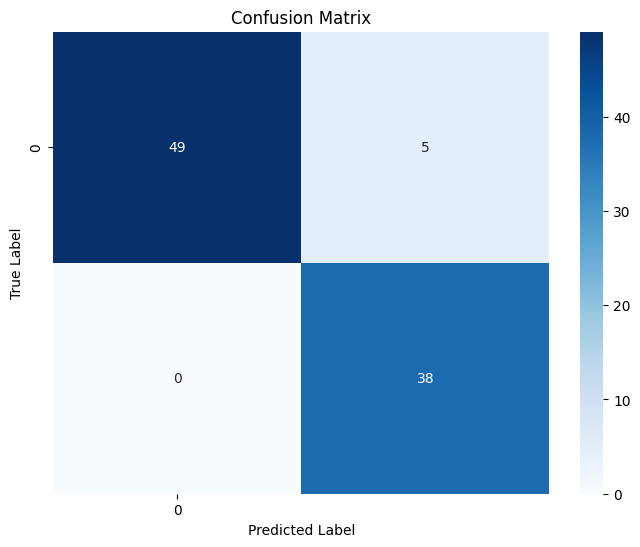

In [108]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=2, yticklabels=2)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Random Forest

In [109]:
Y_pred_rf = grid_search_rf.predict(X_test)

accuracy_score_rf = accuracy_score(Y_test, Y_pred_rf)
precision_score_rf = precision_score(Y_test, Y_pred_rf)
recall_score_rf = recall_score(Y_test, Y_pred_rf)
f1_score_fr = f1_score(Y_test, Y_pred_rf)

print("Accuracy: ", accuracy_score_rf)
print("Precision: ", precision_score_rf)
print("Recall: ", recall_score_rf)
print("F1: ", f1_score_fr)

Accuracy:  0.8804347826086957
Precision:  0.8648648648648649
Recall:  0.8421052631578947
F1:  0.8533333333333334


#### classification report

In [110]:
print(classification_report(Y_test, Y_pred_rf))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        54
           1       0.86      0.84      0.85        38

    accuracy                           0.88        92
   macro avg       0.88      0.87      0.88        92
weighted avg       0.88      0.88      0.88        92



#### confusion matrix

In [120]:
cm_rf = confusion_matrix(Y_test, Y_pred_rf)
print(cm_rf)

[[49  5]
 [ 6 32]]


#### Plot the confusion matrix 

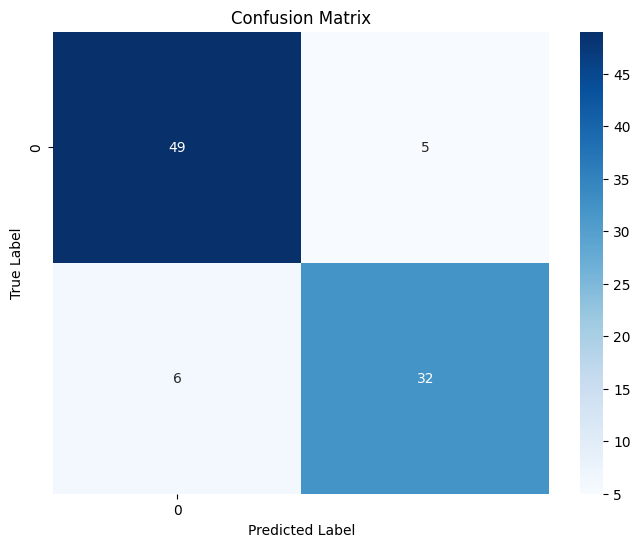

In [121]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=2, yticklabels=2)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### XGBoost

In [113]:
y_pred_xgb = grid_search_xgb.predict(X_test)

accuracy_score_xgb = accuracy_score(Y_test, y_pred_xgb)
precision_score_xgb = precision_score(Y_test, y_pred_xgb)
recall_score_xgb = recall_score(Y_test, y_pred_xgb)
f1_score_xgb = f1_score(Y_test, y_pred_xgb)

print("Accuracy: ", accuracy_score_xgb)
print("Precision: ", precision_score_xgb)
print("Recall: ", recall_score_xgb)
print("F1: ", f1_score_xgb)

Accuracy:  0.8913043478260869
Precision:  0.868421052631579
Recall:  0.868421052631579
F1:  0.868421052631579


#### classification report

In [114]:
print(classification_report(Y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        54
           1       0.87      0.87      0.87        38

    accuracy                           0.89        92
   macro avg       0.89      0.89      0.89        92
weighted avg       0.89      0.89      0.89        92



#### confusion matrix

In [115]:
cm_xgb = confusion_matrix(Y_test, y_pred_xgb)
print(cm_xgb)

[[49  5]
 [ 5 33]]


#### Plot the confusion matrix 

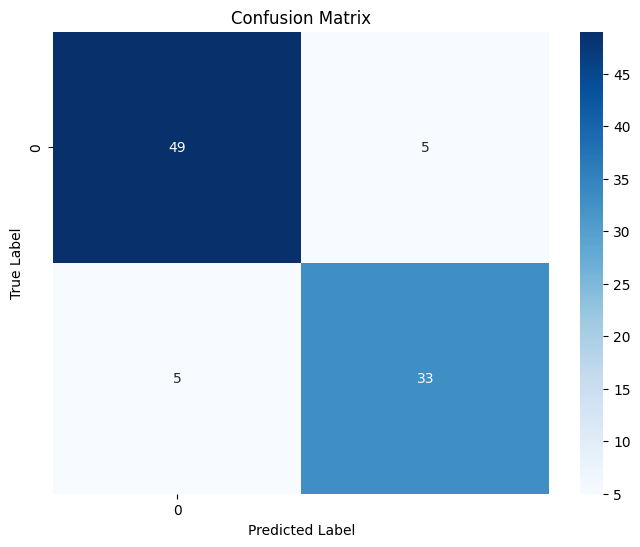

In [116]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=2, yticklabels=2)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## 18. Plot best models vs accuracy 

### Accuracy

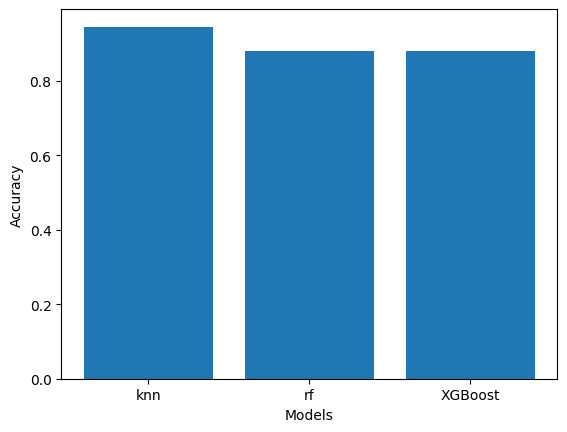

In [ ]:
plt.bar(['knn', 'rf', 'XGBoost'], [accuracy_score_knn, accuracy_score_rf, accuracy_score_xgb])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

### Precision

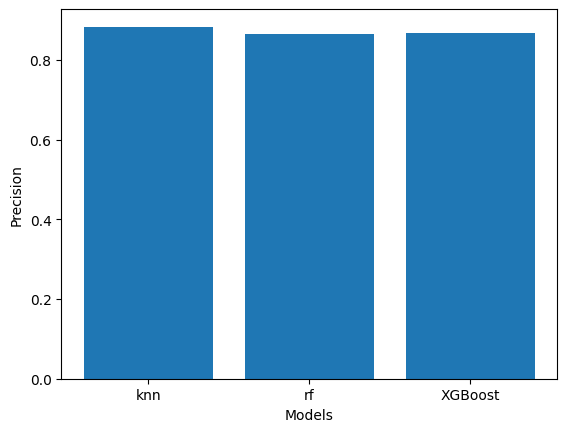

In [122]:
plt.bar(['knn', 'rf', 'XGBoost'], [precision_score_knn, precision_score_rf, precision_score_xgb])
plt.xlabel('Models')
plt.ylabel('Precision')
plt.show()

### Recall

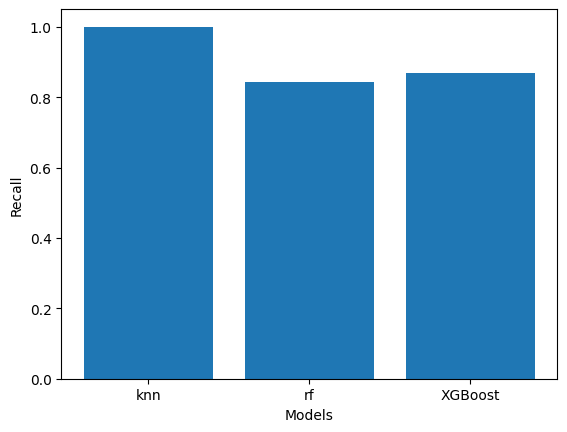

In [123]:
plt.bar(['knn', 'rf', 'XGBoost'], [recall_score_knn, recall_score_rf, recall_score_xgb])
plt.xlabel('Models')
plt.ylabel('Recall')
plt.show()

### F1

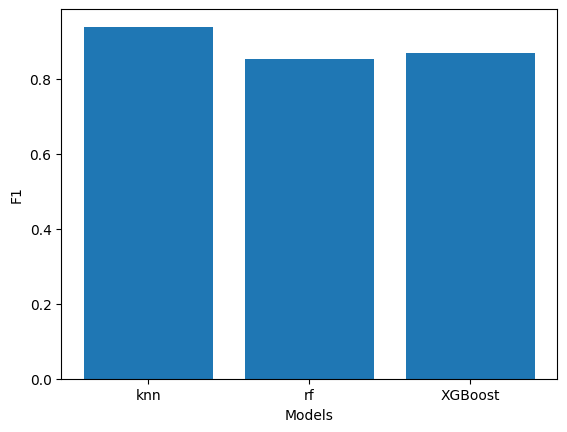

In [125]:
plt.bar(['knn', 'rf', 'XGBoost'], [f1_score_knn, f1_score_fr, f1_score_xgb])
plt.xlabel('Models')
plt.ylabel('F1')
plt.show()